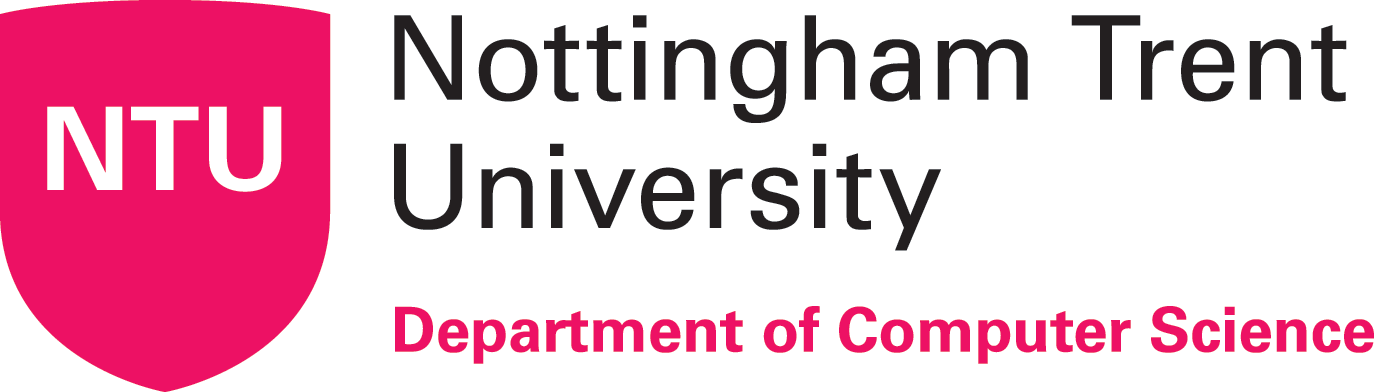

## SOFT40161 - Introduction to Computer Programming
## Submission of the Coursework

### Name: NWOGO EVERISTUS UGOCHUKWU
### NTU ID: N1280799

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

## Start your answer here-

<font  color= 'green'> **GitHub Link to access my work.** </font>

My GitHub Link: <a href="https://github.com/guavacoderepo/SOFT40161-COURSE-WORK.git"> (Click here)</a>

In [ ]:
# import packages
import pandas as pd
import seaborn as sns
from pandas.core.series import Series
from pandas.core.frame import DataFrame

In [87]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 7)

# Section 1: Control Structures (16 marks)


In [2]:
# Explanation and Documentation 

In [109]:
# Evalauting percentage of missing values
def evalute_miss_values(df:DataFrame):
    miss_values = dict()
    for col in df.columns:
        val = (df[col].isnull().sum()/len(df))*100
        miss_values[col] = val

    return miss_values

In [2]:
# grouping ages into various categories

def group_age(age:int):
    group = None
    if age <= 20:
        group = '20 down'
    elif 30 >= age > 20:
        group = '21-30'
    elif 40 >= age > 30:
        group = '31-40'
    elif 50 >= age > 40:
        group = '41-50'
    else:
        group = '51 up'
    
    return group

In [110]:
# cleaning gender column using regular expression
def clean_gender(col:Series) -> Series:
    import re

    genders = list(col)
    male_pattern = r'\b(male(?:[-\s]?(?:leaning|ish|cis|trans))?|m(?:ale)?|man|guy|msle|mal(?:e|r)?|maile|mail)\b'
    female_pattern = r'\b(female(?:[-\s]?(?:leaning|ish|cis|trans))?|f(?:emale)?|woman|femake|femail|trans[-\s]?female|cis[-\s]?female)\b'

    new_gender = []  
    for gender in genders:
        if re.search(male_pattern, gender, re.IGNORECASE):
            new_gender.append('Male')
        elif re.search(female_pattern, gender, re.IGNORECASE):
            new_gender.append('Female')
        else:
            new_gender.append('Others')
            
    col = Series(new_gender)

    return col

In [ ]:
# Reflection on results 

# Section 2: Functions and Modules (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# pie chart plot
def plot_pie_chart(values: list, labels: list):
    plt.pie(values, labels=labels, autopct='%1.2f%%');

# bar chart plot function
def plot_bar_chart(x:list,y:list):
    
    plt.bar(x = x, height = y);
    plt.title('Missing values distribution', fontsize=14)
    plt.xticks(rotation=90, fontsize=10);


In [ ]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [ ]:
# Explanation and Documentation 

In [176]:
# import dataset into pandas
url = 'dataset/survey.csv'

df = pd.read_csv(url)
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [177]:
# Checking the shape of the dataset
size = df.shape
print(f'The dataset has {size[1]} columns and {size[0]} rows')

The dataset has 27 columns and 1259 rows


In [132]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [139]:
df.isnull().sum()

Age                   0
Gender                0
Country               0
state               515
self_employed        18
family_history        0
treatment             0
no_employees          0
work_interfere      264
wellness_program      0
leave                 0
care_options          0
dtype: int64

In [178]:
# selecting revalevant columns for analysis
select_cols = ['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'no_employees', 'work_interfere', 'wellness_program', 'leave', 'care_options']

In [179]:
# drill down the demention of the dataset
df = df[select_cols]
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options
0,37,Female,United States,IL,NaN,No,Yes,6-25,Often,No,Somewhat easy,Not sure
1,44,M,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,6-25,Rarely,No,Somewhat difficult,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,26-100,Often,No,Somewhat difficult,Yes
4,31,Male,United States,TX,NaN,No,No,100-500,Never,Don't know,Don't know,No


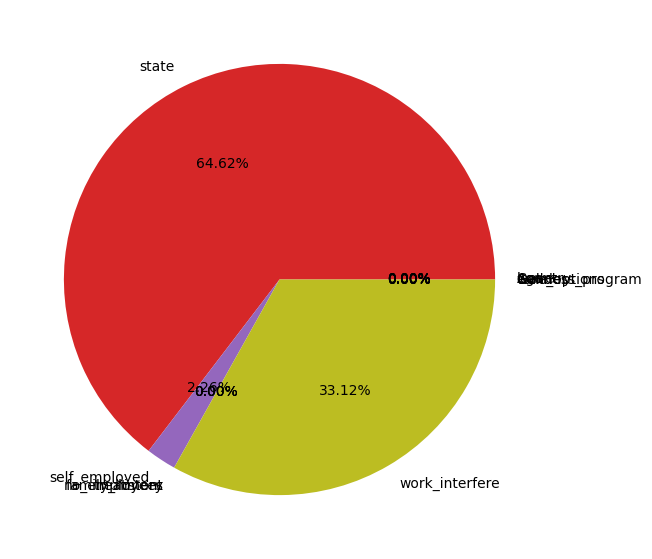

In [180]:
# ploting a pie chat of missing values
miss_values: dict = evalute_miss_values(df)
plot_pie_chart(miss_values.values(), miss_values.keys())

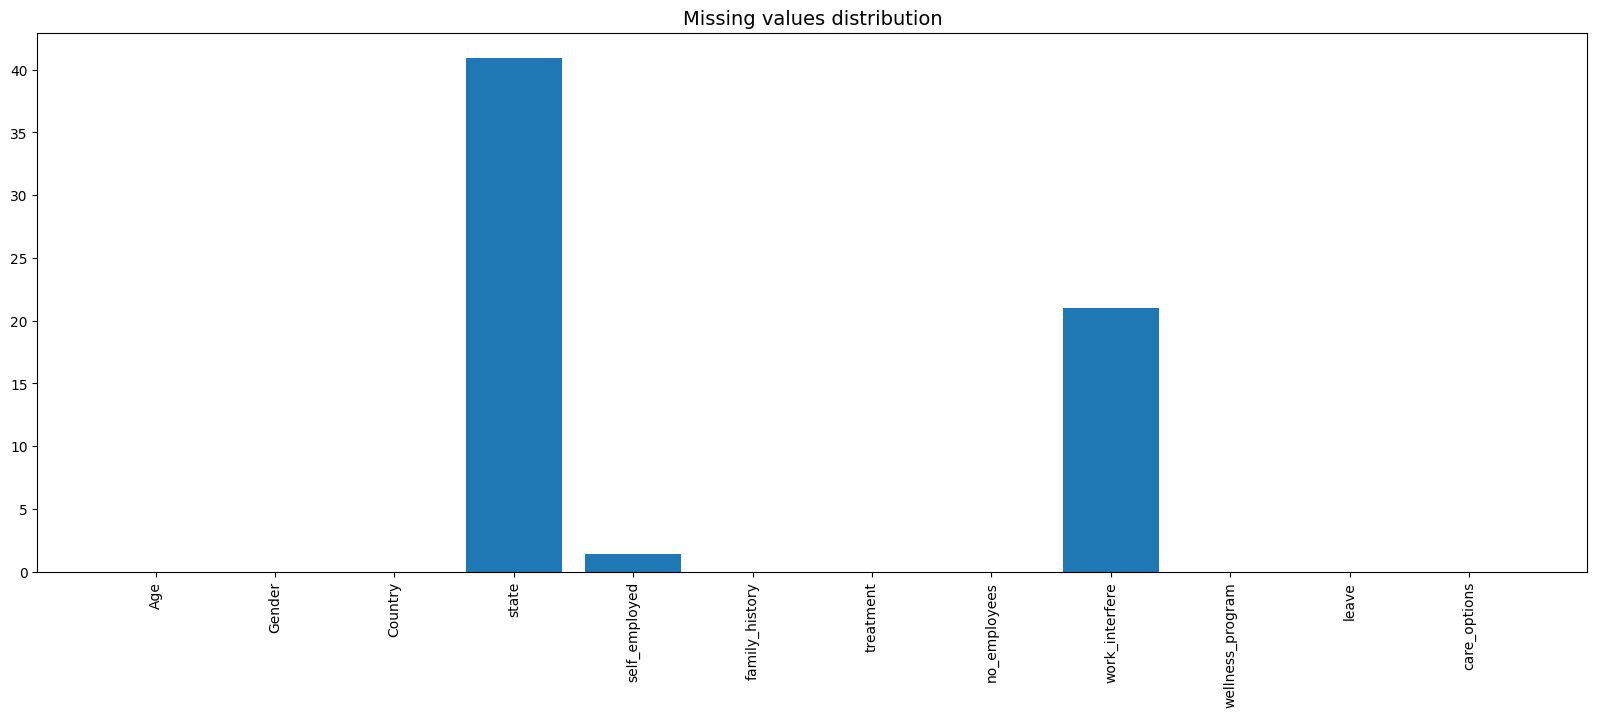

In [181]:
# Bar chart distribution of missing values
plot_bar_chart(miss_values.keys(), miss_values.values())

In [182]:
# grouping age 
df['Age'] = df['Age'].apply(group_age)
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options
0,31-40,Female,United States,IL,NaN,No,Yes,6-25,Often,No,Somewhat easy,Not sure
1,41-50,M,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No
2,31-40,Male,Canada,NaN,NaN,No,No,6-25,Rarely,No,Somewhat difficult,No
3,31-40,Male,United Kingdom,NaN,NaN,Yes,Yes,26-100,Often,No,Somewhat difficult,Yes
4,31-40,Male,United States,TX,NaN,No,No,100-500,Never,Don't know,Don't know,No


In [142]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [143]:
# clean gender column
df['Gender'] = clean_gender(df['Gender'])
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options
0,31-40,Female,United States,IL,NaN,No,Yes,6-25,Often,No,Somewhat easy,Not sure
1,41-50,Male,United States,IN,NaN,No,No,More than 1000,Rarely,Don't know,Don't know,No
2,31-40,Male,Canada,NaN,NaN,No,No,6-25,Rarely,No,Somewhat difficult,No
3,31-40,Male,United Kingdom,NaN,NaN,Yes,Yes,26-100,Often,No,Somewhat difficult,Yes
4,31-40,Male,United States,TX,NaN,No,No,100-500,Never,Don't know,Don't know,No


In [183]:
# fillna on self employed column
self_employed_mode = df['self_employed'].mode()[0]
df['self_employed'] = df['self_employed'].fillna(self_employed_mode)

df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,work_interfere,wellness_program,leave,care_options
0,31-40,Female,United States,IL,No,No,Yes,6-25,Often,No,Somewhat easy,Not sure
1,41-50,M,United States,IN,No,No,No,More than 1000,Rarely,Don't know,Don't know,No
2,31-40,Male,Canada,NaN,No,No,No,6-25,Rarely,No,Somewhat difficult,No
3,31-40,Male,United Kingdom,NaN,No,Yes,Yes,26-100,Often,No,Somewhat difficult,Yes
4,31-40,Male,United States,TX,No,No,No,100-500,Never,Don't know,Don't know,No


In [184]:
# drop all columns with missing values
df.dropna(axis=1, inplace=True)

In [146]:
df.isnull().sum()

Age                 0
Gender              0
Country             0
self_employed       0
family_history      0
treatment           0
no_employees        0
wellness_program    0
leave               0
care_options        0
dtype: int64

In [186]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options
0,31-40,Female,United States,0,0,1,6-25,No,2,1
1,41-50,M,United States,0,0,0,More than 1000,Don't know,0,0
2,31-40,Male,Canada,0,0,0,6-25,No,1,0
3,31-40,Male,United Kingdom,0,1,1,26-100,No,1,2
4,31-40,Male,United States,0,0,0,100-500,Don't know,0,0


In [ ]:
# converting categorical variables to numericalvariables
# working without library
df[['self_employed', 'family_history', 'treatment']] = df[['self_employed', 'family_history', 'treatment']].map(lambda a: 1 if a == 'Yes' else 0)

# df['care_options'] = df['care_options'].map({'Yes': 1, 'No': 0, 'Not sure': 3})
# df['leave'] = df['leave'].map({'Somewhat easy': 0, "Don't know": 1, 'Somewhat difficult': 2, 'Very difficult':3, 'Very easy':4})

# working with sklearn library
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cols = ['leave', 'care_options', 'no_employees', 'wellness_program']
for col in cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options
0,31-40,Female,United States,0,0,1,4,1,2,1
1,41-50,M,United States,0,0,0,5,0,0,0
2,31-40,Male,Canada,0,0,0,4,1,1,0
3,31-40,Male,United Kingdom,0,1,1,2,1,1,2
4,31-40,Male,United States,0,0,0,1,0,0,0


In [ ]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [ ]:
# Explanation and Documentation 

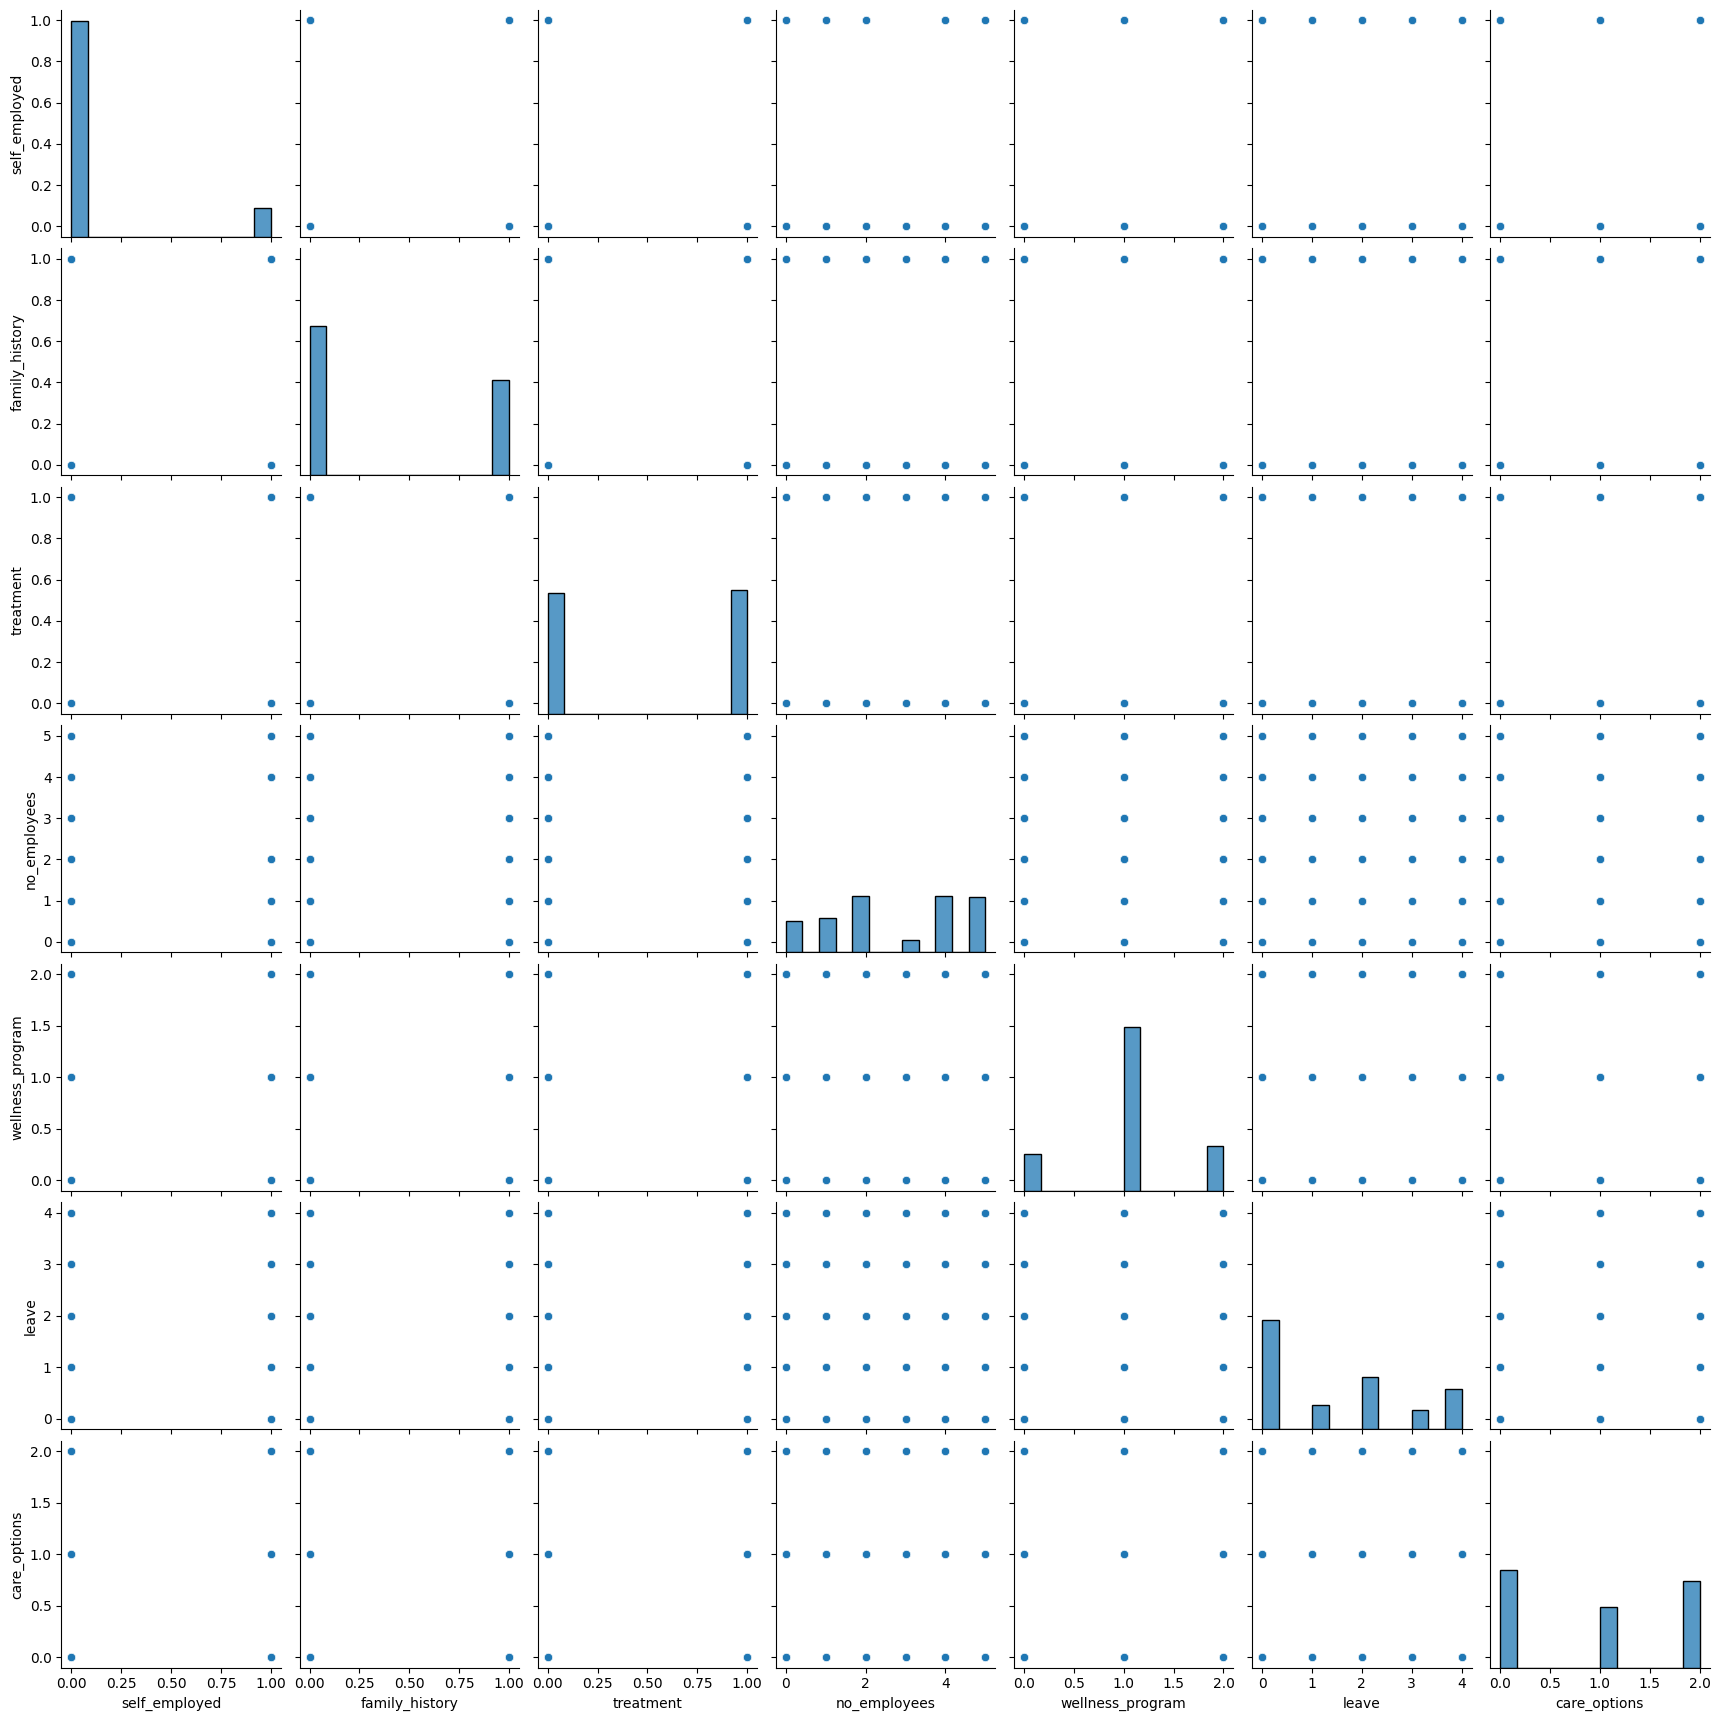

In [193]:
sns.pairplot(df, diag_kind='hist');

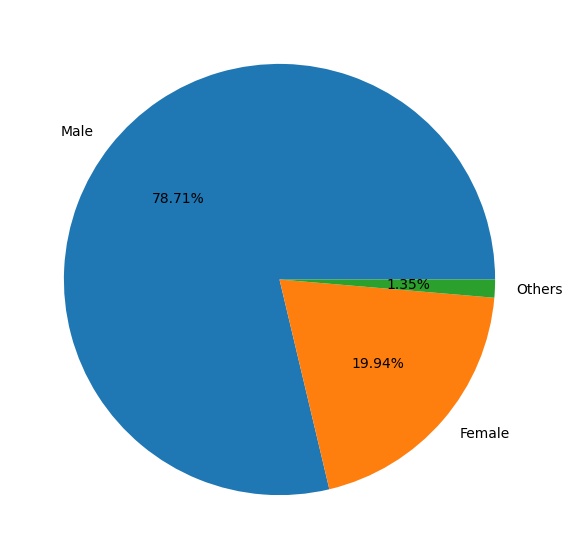

In [155]:
# check the gender distribution
gender_title = df['Gender'].value_counts().index
gender_counts = df['Gender'].value_counts().values

plot_pie_chart(gender_counts, gender_title)

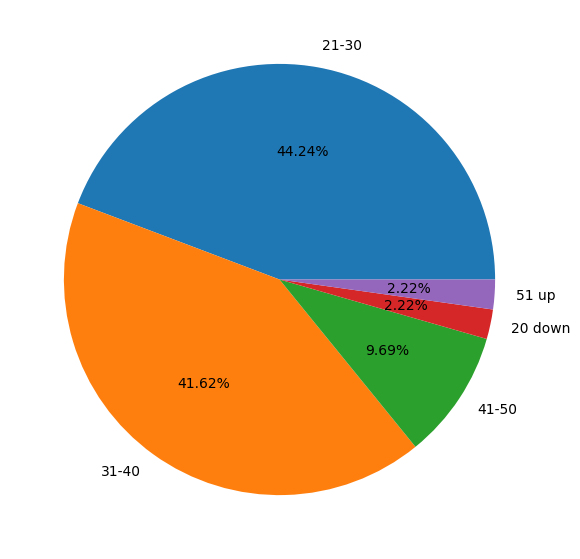

In [156]:
# check age distribution
age_title = df['Age'].value_counts().index
age_counts = df['Age'].value_counts().values

plot_pie_chart(age_counts, age_title)

In [120]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,wellness_program,leave,care_options
0,31-40,Female,United States,No,No,Yes,6-25,No,Somewhat easy,Not sure
1,41-50,Male,United States,No,No,No,More than 1000,Don't know,Don't know,No
2,31-40,Male,Canada,No,No,No,6-25,No,Somewhat difficult,No
3,31-40,Male,United Kingdom,No,Yes,Yes,26-100,No,Somewhat difficult,Yes
4,31-40,Male,United States,No,No,No,100-500,Don't know,Don't know,No


In [ ]:
grouped = df.groupby(['Gender','self_employed']).value_counts()



In [ ]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [ ]:
# Explanation and Documentation 

In [ ]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [ ]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)